In [1]:
from rberga06.phylab import Datum as d

V0 = (d(.076, .001) + d(.088, .001) + d(.086, .001) + d(.091, .001))/4
# V0 = d(.0032, 7e-4)
print(V0, "V")

Datum(best=0.08524999999999999, delta=0.001) V


In [2]:
# Regressione lineare
#    V = AT + B
# => T = (V - B)/A
A1 = d(0.0033371828, 4.9302375173E-6)
B1 = d(-0.8735026125, 0.0014783199)
T1 = (V0 - B1)/A1
print(T1, "K")
print(T1 - d(273.15, .01), "°C")

Datum(best=287.2940051411029, delta=1.1670764881810023) K
Datum(best=14.144005141102923, delta=1.1770764881810023) °C


In [27]:
# Regressione quadratica
#    V = AT² + BT + C
#    0 = AT² + BT + C - V
# => T = (-B + √(B² - 4A(C-V)))/2A
A2 = d(3.1345109092E-6, 4.0664944486E-8)
B2 = d(0.0018186742, 2.0307628607E-5)
B2_2 = B2/2
C2 = d(-0.7260940987, 0.0024171484)
Delta_4 = B2_2**2 - A2*(C2 - V0)
T2 = (Delta_4**.5 - B2_2)/A2
print(T2, "K")
print(T2 - d(273.15, .01), "°C")

Datum(best=295.55981339953087, delta=12.475914391765992) K
Datum(best=22.40981339953089, delta=12.485914391765991) °C


In [10]:
from dataclasses import dataclass

@dataclass(slots=True, frozen=True)
class d2:
    best: float
    delta: float

    @property
    def delta_rel(self, /) -> float:
        return self.best / self.delta

    @classmethod
    def from_delta_rel(cls, best: float, delta_rel: float, /) -> "d2":
        return d2(best, delta_rel * abs(best))

    def __pos__(self, /) -> "d2":
        return self

    def __neg__(self, /) -> "d2":
        return d2(-self.best, self.delta)

    def __add__(self, other: "d2 | d | float") -> "d2":
        if isinstance(other, d2 | d):
            return d2(self.best + other.best, (self.delta ** 2 + other.delta ** 2) ** .5)
        return d2(self.best + other, self.delta)

    __radd__ = __add__

    def __sub__(self, other: "d2 | float") -> "d2":
        if isinstance(other, d2 | d):
            return d2(self.best - other.best, (self.delta ** 2 + other.delta ** 2) ** .5)
        return d2(self.best - other, self.delta)

    def __rsub__(self, other: "d2 | d | float") -> "d2":
        if isinstance(other, d2 | d):
            return d2(other.best - self.best, (self.delta ** 2 + other.delta ** 2) ** .5)
        return d2(other - self.best, self.delta)

    def __mul__(self, other: "d2 | d | float") -> "d2":
        if isinstance(other, d2 | d):
            return d2.from_delta_rel(self.best * other.best, (self.delta_rel ** 2 + other.delta_rel ** 2) ** .5)
        return d2.from_delta_rel(self.best * other, self.delta_rel)

    __rmul__ = __mul__

    def __truediv__(self, other: "d2 | d | float") -> "d2":
        if isinstance(other, d2 | d):
            return d2.from_delta_rel(self.best / other.best, (self.delta_rel ** 2 + other.delta_rel ** 2) ** .5)
        return d2.from_delta_rel(self.best / other, self.delta_rel)

    def __rtruediv__(self, other: "d2 | d | float") -> "d2":
        if isinstance(other, d2 | d):
            return d2.from_delta_rel(other.best / self.best, (self.delta_rel ** 2 + other.delta_rel ** 2) ** .5)
        return d2.from_delta_rel(other / self.best, self.delta_rel)

    def __pow__(self, other: float) -> "d2":
        return d2.from_delta_rel(self.best ** other, self.delta_rel * abs(other))


In [13]:
# Regressione cubica
#   f(T)  = AT³ + BT² + CT + D - V
#   f'(T) = 3AT² + 2BT + C
#  Metodo di Newton (delle tangenti)
#   0 - f(Tₙ) = f'(Tₙ)(Tₙ₊₁ - Tₙ)
#   Tₙ₊₁ = Tₙ - f(Tₙ)/f'(Tₙ)
A3 = d2(-9.4026125488E-9, 8.0213829342E-10)
B3 = d2(1.0335859351E-5, 6.1569249727E-7)
C3 = d2(2.3272301055E-4, 1.3681329502E-4)
D3 = d2(-0.6407138592, 0.0076743967)
_3A = 3 * A3
_2B = 2 * B3
T3 = d(300, 0)
for i in range(10):
    print(i, T3, "K")
    #print(i, T3 - d(273.15, .01), "°C")
    T3 = T3 - (A3 * T3 ** 3 + B3 * T3 ** 2 + C3 * T3 + D3 - V0)/(_3A * T3**2 + _2B * T3 + C3)
print(T3, "K")
print(T3 - d2(273.15, .01), "°C")

0 Datum(best=300, delta=0) K
1 Datum(best=294.8120461234081, delta=44.95614611521464) K
2 Datum(best=294.79869550022084, delta=44.99683361728577) K
3 Datum(best=294.7986954073144, delta=44.99683390020524) K
4 Datum(best=294.7986954073144, delta=44.99683390020528) K
5 Datum(best=294.7986954073144, delta=44.996833900205324) K
6 Datum(best=294.7986954073144, delta=44.99683390020537) K
7 Datum(best=294.7986954073144, delta=44.99683390020541) K
8 Datum(best=294.7986954073144, delta=44.99683390020545) K
9 Datum(best=294.7986954073144, delta=44.996833900205495) K
Datum(best=294.7986954073144, delta=44.99683390020554) K
Datum(best=21.64869540731445, delta=45.006833900205535) °C


In [23]:
import sympy
from IPython.display import display
sympy.init_printing()
t = sympy.symbols("t", positive=True)
a, b, c, d_ = sympy.symbols("a b c d")

def eval(P, symbols):
    exprs = sympy.solve(P, t, check=False)
    err_exprs = [sympy.sqrt(sum([(expr.diff(x) * X.delta)**2 for x, X in symbols.items()])) for expr in exprs]
    SUBS = {x: X.best for x, X in symbols.items()}
    return [
        d(expr.simplify().evalf(subs=SUBS), err_expr.evalf(subs=SUBS))
        for expr, err_expr in zip(exprs, err_exprs)
    ]

In [29]:
T1 = eval(a * t + b, {a: A1, b: B1 - V0})[0]
print(T2, "K")
print(T2 - d(273.15, 0.01), "°C")

Datum(best=295.55981339953087, delta=12.475914391765992) K
Datum(best=22.40981339953089, delta=12.485914391765991) °C


In [30]:
T2 = eval(a * t**2 + b * t + c, {a: A2, b: B2, c: C2 - V0})[1]
print(T2, "K")
print(T2 - d(273.15, 0.01), "°C")

Datum(best=295.559813399531, delta=2.11536972280534) K
Datum(best=22.4098133995309, delta=2.12536972280534) °C


In [25]:
T3s = eval(a * t**3 + b * t**2 + c * t + d_, {a: A3, b: B3, c: C3, d_: D3 - V0})

In [26]:
T3 = T3s[1]
T3 = d(complex(T3.best).real, complex(T3.delta).real)
print(T3, "K")
print(T3 - d(273.15, 0.01), "°C")

Datum(best=294.7986954073144, delta=18.1954034244361) K
Datum(best=21.64869540731445, delta=18.205403424436103) °C


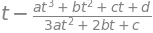

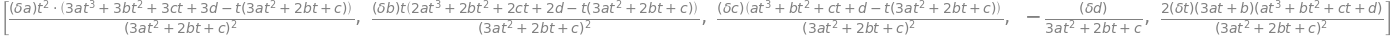

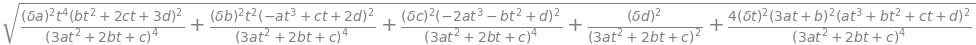

Errori relativi:
A = -9.4026125488e-09 ± 8.0213829342e-10 (err. rel: 0.0853101506902326)
B = 1.0335859351e-05 ± 6.1569249727e-07 (err. rel: 0.05956858315902214)
C = 0.00023272301055 ± 0.00013681329502 (err. rel: 0.5878803935058496)
D = -0.7259638592 ± 0.007739274171973163 (err. rel: 0.010660687958353345)
Sostituisco i parametri...


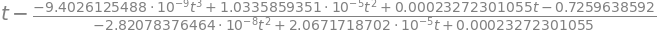

--- inizio termini


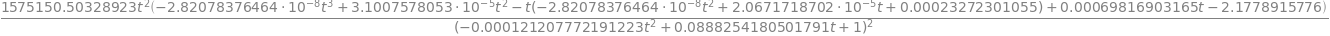

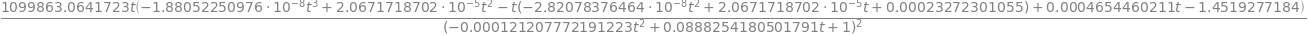

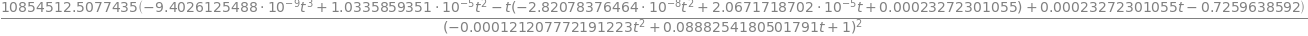

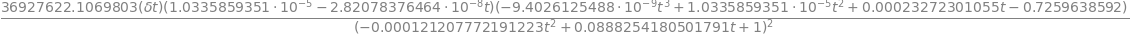

--- fine termini


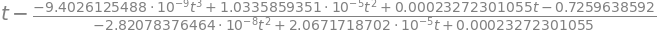

0 Datum(best=300.0, delta=1) K
---
[-560610307.688942, -1328636.86114850, -44490.5000984882, -2.73664407945881, 1.66338774972345e-5]
1 Datum(best=294.812046123408, delta=86914.1425394705) K
---
[-563985793.254229, -1335854.53784468, -44720.3629113561, -2.75090768914803, 0.00410285767723255]
2 Datum(best=294.798695500221, delta=86906.2708686319) K
---
[-563993645.942960, -1335873.13263359, -44720.9853309292, -2.75094597724431, 2.85560399016627e-8]
Datum(best=294.798695407314, delta=86906.2708138545) K
Datum(best=21.6486954073144, delta=86906.2808138545) °C


In [9]:
# Metodo di Newton (delle tangenti)
#   0 - f(Tₙ) = f'(Tₙ)(Tₙ₊₁ - Tₙ)
#   Tₙ₊₁ = Tₙ - f(Tₙ)/f'(Tₙ)
def _delta(x): return sympy.Symbol(fr"(\delta {x})")

F = a * t**3 + b * t**2 + c * t + d_
newton = t - F/F.diff(t)
newton_err_terms = [(newton.diff(x) * _delta(x)).simplify() for x in (a, b, c, d_, t)]
newton_err = sympy.sqrt(sum([t**2 for t in newton_err_terms])).simplify()
display(newton)
display(newton_err_terms)
display(newton_err)

D_V = d(D3.best - V0.best, (D3.delta**2 + V0.delta**2)**.5)
T3 = d(300.0, 1)

print("Errori relativi:")
for name, X in zip("ABCDT", (A3, B3, C3, D_V)):
    print(f"{name} = {X.best} ± {X.delta} (err. rel: {X.delta_rel})")

print("Sostituisco i parametri...")
_CONST_SUBS = {a: A3, b: B3, c: C3, d_: D_V}
CONST_SUBS = {x: X.best for (x, X) in _CONST_SUBS.items()} | {_delta(x): X.delta_rel for (x, X) in _CONST_SUBS.items()}
newton = newton.subs(CONST_SUBS)
newton_err_terms = [term.subs(CONST_SUBS) for term in newton_err_terms]
newton_err = newton.subs(CONST_SUBS)
display(newton)
print("--- inizio termini")
for term in newton_err_terms:
    display(term)
print("--- fine termini")
display(newton_err)

for i in range(3):
    print(i, T3, "K")
    print("---")
    #print(i, T3 - d(273.15, .01), "°C")
    # T3 = T3 - (A3 * T3 ** 3 + B3 * T3 ** 2 + C3 * T3 + D3 - V0)/(_3A * T3**2 + _2B * T3 + C3)
    SUBS = {t: T3.best, _delta(t): T3.delta_rel}
    print([term.evalf(subs=SUBS) for term in newton_err_terms])
    T3 = d.from_delta_rel(newton.evalf(subs=SUBS), newton_err.evalf(subs=SUBS))
print(T3, "K")
print(T3 - d(273.15, .01), "°C")